# Preliminary Predictive Analytics Model

## Importing the Libraries

In [1]:
# Importing required packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [2]:
# Uploading the dataset
data=pd.read_csv('job_in_data.csv')

In [3]:
data.head()

,work_year,job_category,salary_in_usd,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data Engineering,95012,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architecture and Modeling,186000,Senior,Full-time,In-person,United States,M
2,2023,Data Architecture and Modeling,81800,Senior,Full-time,In-person,United States,M
3,2023,Data Science and Research,212000,Senior,Full-time,In-person,United States,M
4,2023,Data Science and Research,93300,Senior,Full-time,In-person,United States,M


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         9355 non-null   int64 
 1   job_category      9355 non-null   object
 2   salary_in_usd     9355 non-null   int64 
 3   experience_level  9355 non-null   object
 4   employment_type   9355 non-null   object
 5   work_setting      9355 non-null   object
 6   company_location  9355 non-null   object
 7   company_size      9355 non-null   object
dtypes: int64(2), object(6)
memory usage: 584.8+ KB


### Most data are object data types; only two columns are integer data types. 

In [5]:
data.describe()

,work_year,salary_in_usd
count,9355.000000,9355.000000
mean,2022.760449,150299.495564
std,0.519470,63177.372024
min,2020.000000,15000.000000
25%,2023.000000,105700.000000
50%,2023.000000,143000.000000
75%,2023.000000,186723.000000
max,2023.000000,450000.000000


### The lowest salary was 9,355, the average wage was 143,000, and the maximum salary was 450,000.

In [6]:
# Missing Value
data.isnull().sum()

work_year           0
job_category        0
salary_in_usd       0
experience_level    0
employment_type     0
work_setting        0
company_location    0
company_size        0
dtype: int64

### There are no missing data in the dataset.

In [7]:
data.nunique()

work_year              4
job_category          10
salary_in_usd       1786
experience_level       4
employment_type        4
work_setting           3
company_location      70
company_size           3
dtype: int64

### Salary_in_usd and company_location are the only columns that have highly unique variables.

In [8]:
data.columns

Index(['work_year', 'job_category', 'salary_in_usd', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [9]:
objects= data.select_dtypes(include=['object'])
objects

,job_category,experience_level,employment_type,work_setting,company_location,company_size
0,Data Engineering,Mid-level,Full-time,Hybrid,Germany,L
1,Data Architecture and Modeling,Senior,Full-time,In-person,United States,M
2,Data Architecture and Modeling,Senior,Full-time,In-person,United States,M
3,Data Science and Research,Senior,Full-time,In-person,United States,M
4,Data Science and Research,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...
9350,Data Management and Strategy,Senior,Full-time,Remote,United States,L
9351,Data Science and Research,Senior,Full-time,Remote,United States,L
9352,Data Science and Research,Mid-level,Full-time,Remote,United States,L
9353,Data Science and Research,Entry-level,Full-time,Remote,United States,S


### Data showing only categorical variables.

In [10]:
ints= data.select_dtypes(exclude=['object'])
ints

,work_year,salary_in_usd
0,2023,95012
1,2023,186000
2,2023,81800
3,2023,212000
4,2023,93300
...,...,...
9350,2021,165000
9351,2020,412000
9352,2021,151000
9353,2020,105000


### Data showing only numerical variables.

In [11]:
# Categorical Data Exploration
data['job_category'].value_counts()

Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
Name: job_category, dtype: int64

### Data Science and Research, Data Engineering, Data Analysis, Machine Learning, and AI have more data entries than the other job categories in the dataset.

In [12]:
data['experience_level'].value_counts()

Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: experience_level, dtype: int64

### The majority of positions are senior level in the dataset. 

In [13]:
data['employment_type'].value_counts()

Full-time    9310
Contract       19
Part-time      15
Freelance      11
Name: employment_type, dtype: int64

### Full-time employment has the most data than other employment types in the dataset.  

In [14]:
data['work_setting'].value_counts()

In-person    5730
Remote       3434
Hybrid        191
Name: work_setting, dtype: int64

### Hybrid positions are the lowest in the dataset. 

In [15]:
data['company_location'].value_counts()

United States     8132
United Kingdom     449
Canada             226
Spain              113
Germany             72
                  ... 
Gibraltar            1
Ecuador              1
Andorra              1
Mauritius            1
Malta                1
Name: company_location, Length: 70, dtype: int64

### The United States has the highest amount in the dataset compared to other countries. Since the data between the United States and non-United States countries are very imbalanced, I will group the non-United States countries into one category. 

In [16]:
# Converted the country category to United States or Non-United States 
data['country_category'] = data['company_location'].apply(lambda x: 'United States' if x 
                                                          == 'United States' else 'Non-United States')

In [17]:
data['country_category'].value_counts()

United States        8132
Non-United States    1223
Name: country_category, dtype: int64

In [18]:
# Replaced it with country_category since I no longer needed the company_location column
data=data.drop(columns=['company_location'])

In [19]:
data.head()

,work_year,job_category,salary_in_usd,experience_level,employment_type,work_setting,company_size,country_category
0,2023,Data Engineering,95012,Mid-level,Full-time,Hybrid,L,Non-United States
1,2023,Data Architecture and Modeling,186000,Senior,Full-time,In-person,M,United States
2,2023,Data Architecture and Modeling,81800,Senior,Full-time,In-person,M,United States
3,2023,Data Science and Research,212000,Senior,Full-time,In-person,M,United States
4,2023,Data Science and Research,93300,Senior,Full-time,In-person,M,United States


### Even though the data is still very much imbalanced, it would make it easier to comprehend and implement before doing the one-hot encoding for my preliminary predictive analytics model.

In [20]:
data['company_size'].value_counts()

M    8448
L     748
S     159
Name: company_size, dtype: int64

### Medium-size companies are the highest compared to small and large companies in the dataset.  

## Splitting the Dataset into Independent (X) and Dependent (Y) Variables

In [21]:
data.columns

Index(['work_year', 'job_category', 'salary_in_usd', 'experience_level',
       'employment_type', 'work_setting', 'company_size', 'country_category'],
      dtype='object')

In [22]:
x=data[['work_year', 'job_category', 'experience_level', 'employment_type', 
        'work_setting', 'company_size', 'country_category']]

In [23]:
y=data[['salary_in_usd']]

In [24]:
y.head()

,salary_in_usd
0,95012
1,186000
2,81800
3,212000
4,93300


### Since I am trying to predict salary trends in data-related careers, I left salary_in_usd as my dependent variable and all the other columns in the dataset as my independent variables.

## Transforming the Data

In [25]:
data.head()

,work_year,job_category,salary_in_usd,experience_level,employment_type,work_setting,company_size,country_category
0,2023,Data Engineering,95012,Mid-level,Full-time,Hybrid,L,Non-United States
1,2023,Data Architecture and Modeling,186000,Senior,Full-time,In-person,M,United States
2,2023,Data Architecture and Modeling,81800,Senior,Full-time,In-person,M,United States
3,2023,Data Science and Research,212000,Senior,Full-time,In-person,M,United States
4,2023,Data Science and Research,93300,Senior,Full-time,In-person,M,United States


In [26]:
# pd.get_dummies

x_new=pd.get_dummies(data[['work_year','job_category','experience_level', 'employment_type',
       'work_setting', 'company_size', 'country_category']]).astype(int)

In [27]:
x_new.head()

,work_year,job_category_BI and Visualization,job_category_Cloud and Database,job_category_Data Analysis,job_category_Data Architecture and Modeling,job_category_Data Engineering,job_category_Data Management and Strategy,job_category_Data Quality and Operations,job_category_Data Science and Research,job_category_Leadership and Management,...,employment_type_Full-time,employment_type_Part-time,work_setting_Hybrid,work_setting_In-person,work_setting_Remote,company_size_L,company_size_M,company_size_S,country_category_Non-United States,country_category_United States
0,2023,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
1,2023,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
2,2023,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
3,2023,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
4,2023,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1


### I needed to convert most of my columns from categorical to numerical variables for the ML prediction model to function, so I had to create dummy variables for the categorical columns. 

<AxesSubplot:>

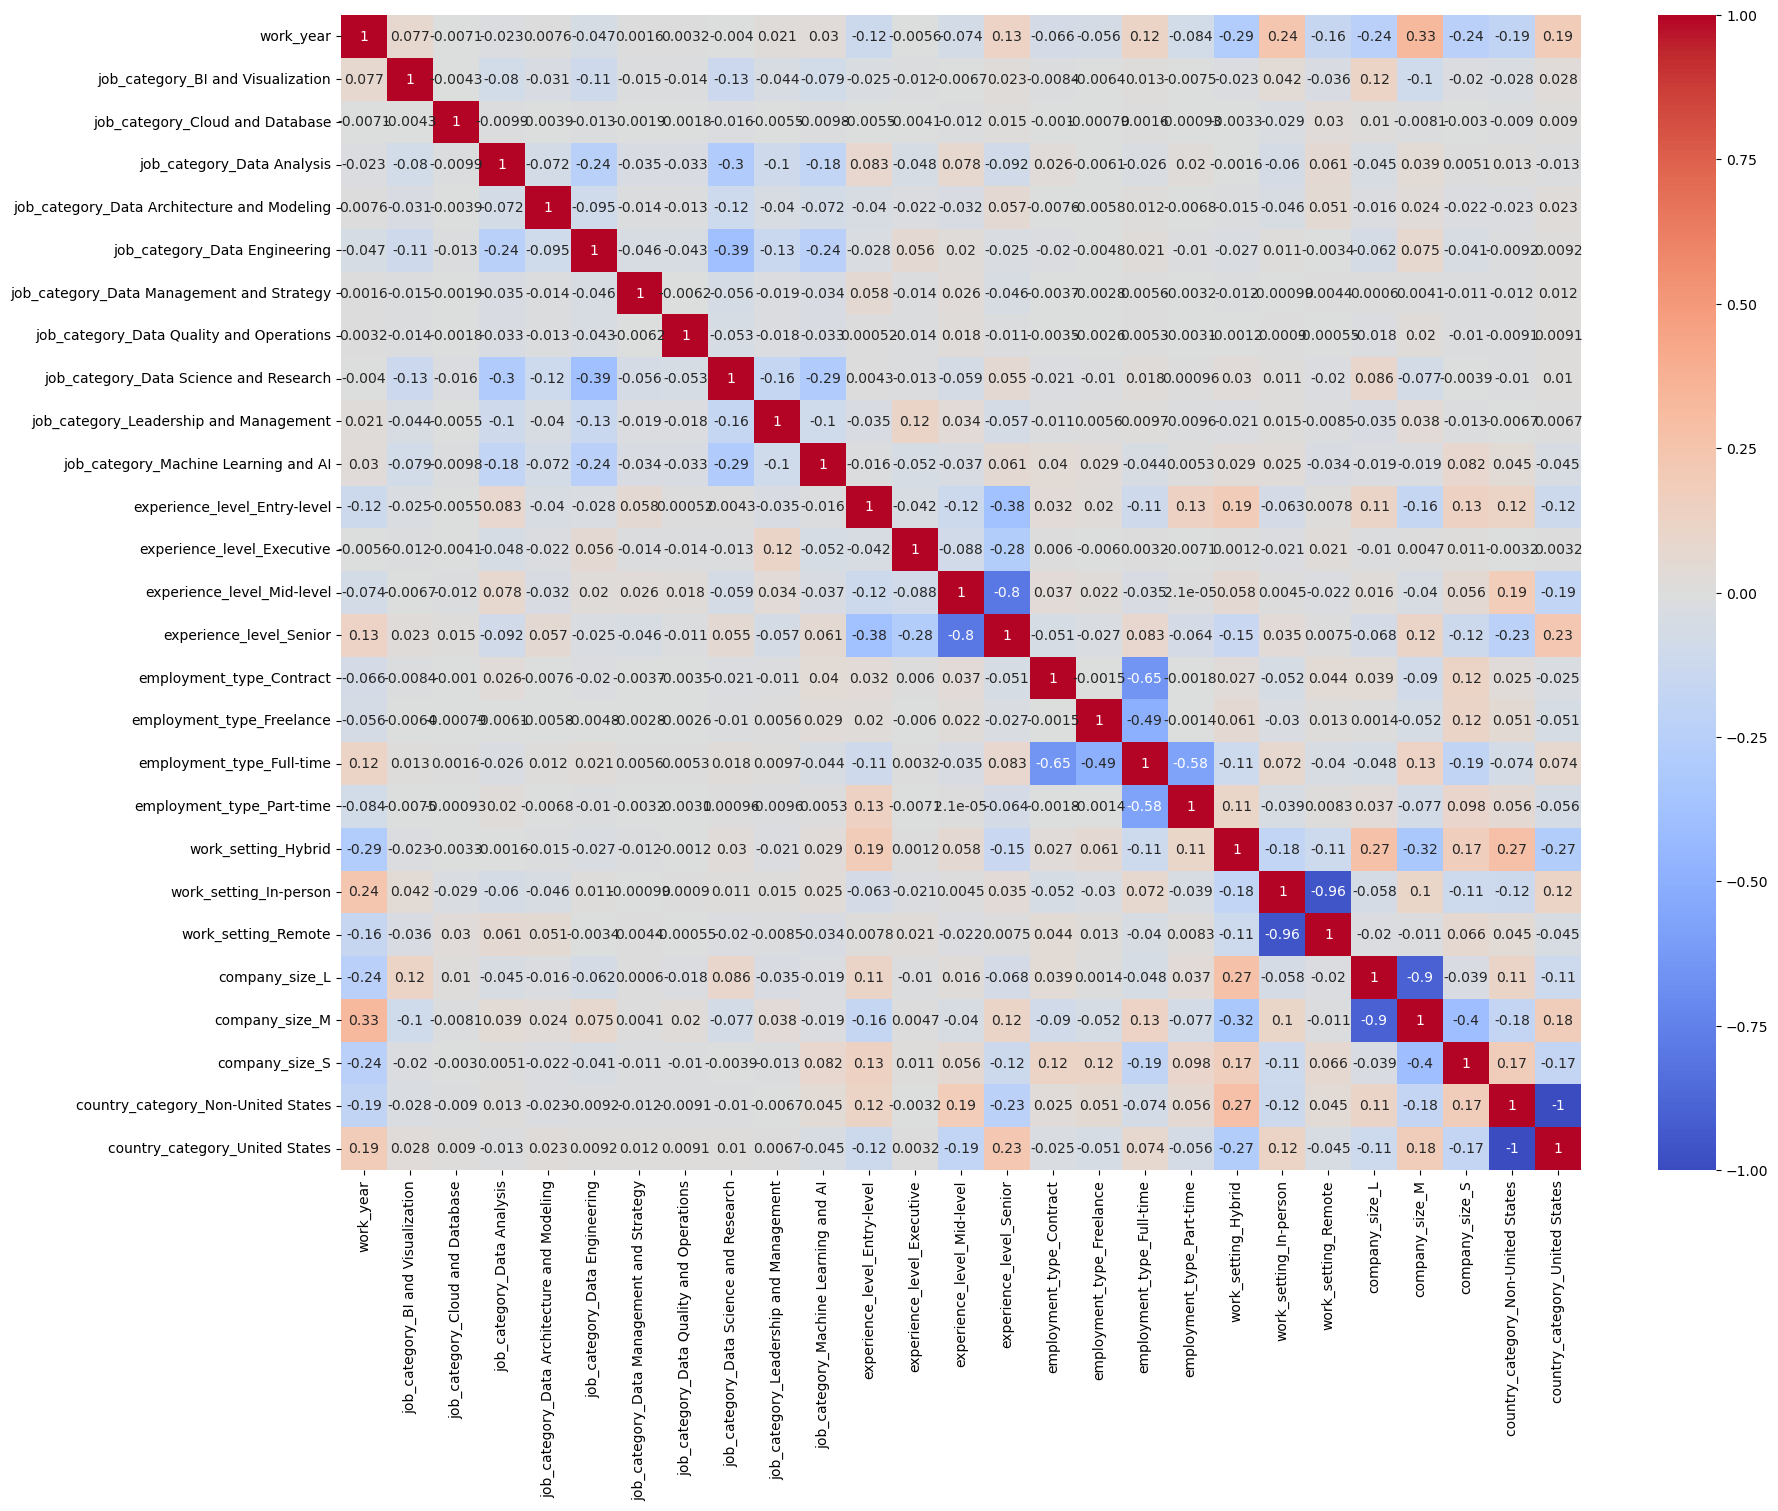

In [28]:
plt.figure(figsize=(20,15))
sns.heatmap(x_new.corr(),annot=True,cmap="coolwarm")

### This visualization demonstrates the correlation between all the variables.

# Linear Regression

## Splitting the Dataset

In [29]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x_new, y, test_size=0.15, random_state=1)

In [30]:
# Training the Multiple linear Regression model on the training set
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
# .fit to train the model
regressor.fit(X_train.values, y_train)

LinearRegression()

## Intercept and Coefficient

In [31]:
print(f"coefficient: {regressor.coef_}")

coefficient: [[ 8.03722408e+03 -7.76844782e+17 -7.76844782e+17 -7.76844782e+17
  -7.76844782e+17 -7.76844782e+17 -7.76844782e+17 -7.76844782e+17
  -7.76844782e+17 -7.76844782e+17 -7.76844782e+17  6.33809138e+17
   6.33809138e+17  6.33809138e+17  6.33809138e+17 -8.79561622e+16
  -8.79561622e+16 -8.79561622e+16 -8.79561622e+16  1.24262503e+18
   1.24262503e+18  1.24262503e+18  7.70287349e+17  7.70287349e+17
   7.70287349e+17 -3.40108060e+17 -3.40108060e+17]]


### These results represent the effect of one independent variable on the dependent variable, controlling for the effects of other independent variables. 

In [32]:
print(f"Intercept: {regressor.intercept_}")

Intercept: [-1.44181251e+18]


### This result represents the value of the dependent variable when all independent variables are zero.

## Predicting the Test Set Results

In [33]:
y_pred= regressor.predict(X_test.values)

## Calculate RMSE, R-Sqaure

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
import math

print(f"MSE: {mean_squared_error(y_test,y_pred):.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test,y_pred)):.2f}")
print(f"R-square: {r2_score(y_test,y_pred):.2f}") 

MSE: 2753700959.18
RMSE: 52475.72
R-square: 0.33


### Best Accuracy Score: 33%

### The accuracy score from using the linear regression model was 33% while using a test size of 15% and a random state of 1.  

## Validation Data

In [35]:
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, y_val=train_test_split(x_new, y, test_size=0.50, random_state=1)

In [36]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
# .fit to train the model
regressor.fit(X_test.values, y_test)

LinearRegression()

In [37]:
y_pred_val= regressor.predict(X_val.values)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
import math

print(f"MSE: {mean_squared_error(y_val,y_pred_val):.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_val,y_pred_val)):.2f}")
print(f"R-square: {r2_score(y_val,y_pred_val):.2f}")

MSE: 2759862541.16
RMSE: 52534.39
R-square: 0.31


### Accuracy Score: 31%

### After testing the validation data and splitting the testing size in half, the accuracy score from the validation data using the linear regression model was 31%. Although the accuracy score dropped slightly, this can also demonstrate how the validation and testing data are very similar, which is good. 

# K-Nearest Neighbor 

In [39]:
#importing additional required packages
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

## Splitting the Dataset into Independent (X) and Dependent (Y) Variables

In [40]:
data.columns

Index(['work_year', 'job_category', 'salary_in_usd', 'experience_level',
       'employment_type', 'work_setting', 'company_size', 'country_category'],
      dtype='object')

In [41]:
x2=data[['work_year', 'job_category', 'experience_level', 'employment_type', 
        'work_setting', 'company_size', 'country_category']]

In [42]:
y2=data[['salary_in_usd']]

In [43]:
y2.head()

,salary_in_usd
0,95012
1,186000
2,81800
3,212000
4,93300


### I split the dataset by leaving salary_in_usd as my dependent variable and all the other columns in the dataset as my independent variables.

## Transforming the Data

In [44]:
# pd.get_dummies 

x_new_2= pd.get_dummies(data[['work_year','job_category','experience_level', 'employment_type',
                            'work_setting', 'company_size', 'country_category']]).astype(int)

In [45]:
x_new_2.head()

,work_year,job_category_BI and Visualization,job_category_Cloud and Database,job_category_Data Analysis,job_category_Data Architecture and Modeling,job_category_Data Engineering,job_category_Data Management and Strategy,job_category_Data Quality and Operations,job_category_Data Science and Research,job_category_Leadership and Management,...,employment_type_Full-time,employment_type_Part-time,work_setting_Hybrid,work_setting_In-person,work_setting_Remote,company_size_L,company_size_M,company_size_S,country_category_Non-United States,country_category_United States
0,2023,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
1,2023,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
2,2023,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
3,2023,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
4,2023,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1


### I created dummy variables to convert the categorical variables to numerical variables. 

## Splitting the Dataset

In [46]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x_new_2, y, test_size=0.15, random_state=1)

In [47]:
# Training the KNN model on the training set
k=3  # Choose the value of K (number of neighbors)
knn_regressor=KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

## Predicting the Test Set Results

In [48]:
y_pred= knn_regressor.predict(X_test.values)

## Calculate MSE, RMSE

In [49]:
# Example: Trying different values of K
k_values = list(range(1,51))
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("K =", k, "MSE:", mse)

K = 1 MSE: 5278941117.049857
K = 2 MSE: 4440804192.136752
K = 3 MSE: 3706213622.61491
K = 4 MSE: 3380020726.5600963
K = 5 MSE: 3267138433.9407406
K = 6 MSE: 3169322702.6000113
K = 7 MSE: 3048802999.5709634
K = 8 MSE: 2930807765.6653423
K = 9 MSE: 2989803289.5732827
K = 10 MSE: 2892205930.895734
K = 11 MSE: 2833112677.0413165
K = 12 MSE: 2810555062.4680624
K = 13 MSE: 2840408446.9338365
K = 14 MSE: 2860478170.9901376
K = 15 MSE: 2882961750.5385976
K = 16 MSE: 2886137025.4145937
K = 17 MSE: 2908125598.193424
K = 18 MSE: 2926223585.5709195
K = 19 MSE: 2936234212.986325
K = 20 MSE: 2928262358.490244
K = 21 MSE: 2956191130.026419
K = 22 MSE: 2890216282.507418
K = 23 MSE: 2878222894.522283
K = 24 MSE: 2873698936.90311
K = 25 MSE: 2828930326.9802704
K = 26 MSE: 2833536801.7863674
K = 27 MSE: 2864926211.2237415
K = 28 MSE: 2837808833.006962
K = 29 MSE: 2808082075.3544626
K = 30 MSE: 2820487079.086987
K = 31 MSE: 2810026767.4609604
K = 32 MSE: 2811618834.4936175
K = 33 MSE: 2812326705.3325195
K

In [50]:
rmse_val = [] #to store rmse values for different k
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 72656.32193450104
RMSE value for k=  2 is: 66639.35918161842
RMSE value for k=  3 is: 60878.6795406644
RMSE value for k=  4 is: 58137.94566855709
RMSE value for k=  5 is: 57158.88761986836
RMSE value for k=  6 is: 56296.73793924486
RMSE value for k=  7 is: 55215.96688975901
RMSE value for k=  8 is: 54136.93531836968
RMSE value for k=  9 is: 54679.09371572724
RMSE value for k=  10 is: 53779.23326801651
RMSE value for k=  11 is: 53226.99199693062
RMSE value for k=  12 is: 53014.66837082038
RMSE value for k=  13 is: 53295.48242519094
RMSE value for k=  14 is: 53483.438286913995
RMSE value for k=  15 is: 53693.21885060159
RMSE value for k=  16 is: 53722.77939026045
RMSE value for k=  17 is: 53927.039583064674
RMSE value for k=  18 is: 54094.580001797956
RMSE value for k=  19 is: 54187.029933244405
RMSE value for k=  20 is: 54113.42124177923
RMSE value for k=  21 is: 54370.866555779845
RMSE value for k=  22 is: 53760.7317891732
RMSE value for k=  23 is: 53649.071702

<AxesSubplot:>

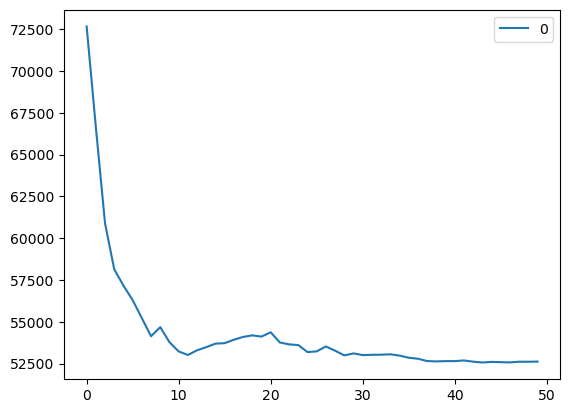

In [51]:
# plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) # elbow curve 
curve.plot()

### As you can see, the MSE and RMSE values decrease as we increase the k values. At k= 44, the MRE is approximately 2763260456.04581, and the RMSE is about 52566.723847371446. The RMSE then slowly increases while the k value rises. We can safely say that k= 44 will give us the best result, as the lower the RMSE score, the better. 

In [52]:
knn = KNeighborsRegressor(n_neighbors=44)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=44)

In [53]:
# Calculate and print the accuracy of the model
print("Accuracy of the model:")
print(knn.score(X_test, y_test))

Accuracy of the model:
0.32305714749912884


### Accuracy Score: 32%

### The KNN model's accuracy score is around 32% while using a test size of 15% and a random state of 1.

## Validation Data

In [54]:
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, y_val=train_test_split(x_new_2, y, test_size=0.50, random_state=1)

In [55]:
k=3  # Choose the value of K (number of neighbors)
knn_regressor=KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_test, y_test)

KNeighborsRegressor(n_neighbors=3)

In [56]:
y_pred_val= knn_regressor.predict(X_val.values)

In [57]:
mse = mean_squared_error(y_val, y_pred_val)
print("Mean Squared Error:", mse)

Mean Squared Error: 3416860466.2908416


In [58]:
knn = KNeighborsRegressor(n_neighbors=44)
knn.fit(X_test, y_test)

KNeighborsRegressor(n_neighbors=44)

In [59]:
# Calculate and print the accuracy of the model
print("Accuracy of the model:")
print(knn.score(X_val, y_pred_val))

Accuracy of the model:
0.5257886614421307


### Accuracy Score: 53%

### After testing the validation data and splitting the testing size in half, the accuracy score from the validation data using the KNN model is about 53%. Although the accuracy score increased somewhat, this indicates how the validation and testing data are relatively close, which is a good indication.

# Summary:

### In this portion of my semester-long project, I developed a preliminary predictive analytics model by implementing a linear regression model as a baseline and a K-Nearest Neighbor model. Although the accuracy score is not what I hoped for, I believe it can improve significantly. I would want to work and experiment more by preparing and cleaning the data differently. Any feedback or suggestions would be greatly appreciated!

### Source used: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/#commentModule